<a href="https://colab.research.google.com/github/filiperobotic/cursoDL/blob/master/codes/aula4/transfer_learning_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/filiperobotic/cursoDL.git

In [0]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from keras import applications
from keras.layers import Input
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from cursoDL.codes.aula4.preprocessing import ImageToArrayPreprocessor
from cursoDL.codes.aula4.preprocessing import SimplePreprocessor
from cursoDL.codes.aula4.datasets import SimpleDatasetLoader
#from pyimagesearch.nn.conv import ShallowNet
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

In [0]:
img_width, img_height = 48, 48

model = applications.VGG16(weights = "imagenet", include_top=False, input_shape=(img_width, img_height, 3))

In [11]:
# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
# for layer in model.layers[:5]:
for layer in model.layers:
  layer.trainable = False
  
#Adding custom layers
x = model.output
x = Flatten()(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(3, activation="softmax")(x)

# creating the final model
model_final = Model(input = model.input, output = predictions)
model = model_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


[INFO] loading images...
[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000
[INFO] compiling model...
[INFO] training network...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 3s 1ms/step - loss: 1.1597 - acc: 0.3111 - val_loss: 1.1339 - val_acc: 0.3213
Epoch 2/10
2250/2250 [==============================] - 3s 1ms/step - loss: 1.1071 - acc: 0.3618 - val_loss: 1.0968 - val_acc: 0.3813
Epoch 3/10
2250/2250 [==============================] - 3s 1ms/step - loss: 1.0711 - acc: 0.4182 - val_loss: 1.0690 - val_acc: 0.4267
Epoch 4/10
2250/2250 [==============================] - 3s 1ms/step - loss: 1.0416 - acc: 0.4698 - val_loss: 1.0329 - val_acc: 0.4947
Epoch 5/10
2250/2250 [==============================] - 3s 1ms/step - loss: 1.0152 - acc: 0.5071 - val_loss: 1.0086 - val_acc: 0.5093
Epoch 6/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.9911 - acc: 0.5307 - val_loss: 0.9857 - val_acc: 0.5320
Epoch 7/10
2250/2250 [==============================] - 3s 1ms/step - loss: 0.9702 - acc: 0.5520 - val_loss: 0.9682 - val_acc: 0.5560
Epoch 8/10
2250

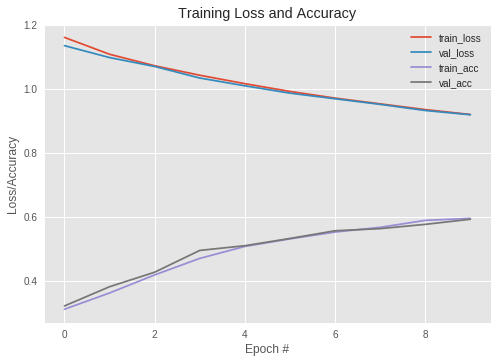

In [12]:
arg_dataset="cursoDL/imagens/datasets/animals"

# grab the list of images that we'll be describing
print("[INFO] loading images...")
imagePaths = list(paths.list_images(arg_dataset))

# initialize the image preprocessors
sp = SimplePreprocessor(48, 48)
iap = ImageToArrayPreprocessor()

# load the dataset from disk then scale the raw pixel intensities
# to the range [0, 1]
#sdl = SimpleDatasetLoader(preprocessors=[sp, iap])
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(imagePaths, verbose=500)
data = data.astype("float") / 255.0

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.25, random_state=42)

# convert the labels from integers to vectors
trainY = LabelBinarizer().fit_transform(trainY)
testY = LabelBinarizer().fit_transform(testY)

# initialize the optimizer and model
print("[INFO] compiling model...")
opt = SGD(lr=0.001)

model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
num_epocas = 10
print("[INFO] training network...")
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	batch_size=32, nb_epoch=num_epocas, verbose=1)

# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=["cat", "dog", "panda"]))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epocas), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, num_epocas), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, num_epocas), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, num_epocas), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()